## Проверка гипотезы о взаимосвязи автомобилизации в стране и уровня смертности в дтп. Основная гипотеза :  увеличение уровня автомобилизации в стране ведёт к значительному увеличению смертности на дорогах. Конкурирующая гипотеза : увеличение уровня автомобилизации в стране не ведёт к значительному увеличению смертности на дорогах. Критерий принятия основной гипотезы - коэфициент корреляции > 0.5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

## Загружаем данные из статьи

In [2]:
url = 'https://fundamental-research.ru/ru/article/view?id=40439'
url

'https://fundamental-research.ru/ru/article/view?id=40439'

In [3]:
accident_rate = pd.read_html(url)[1]
accident_rate

,0,1,2,3,4,5,6
0,Страна,Исходные и расчетные показатели,Исходные и расчетные показатели,Исходные и расчетные показатели,Исходные и расчетные показатели,Исходные и расчетные показатели,Исходные и расчетные показатели
1,Страна,"Население, тыс. чел.","Погибшие в ДТП, чел.","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.","Доля пешеходов в числе погибших, %"
2,Австрия,83607,691,53211,128,693,16
3,Азербайджан,84672,1107,3432,2439,93,38
4,Албания,3190,384,1344,2222,110,40
5,Армения,30023,371,2720,1200,122,39
6,Беларусь,9689,1517,7991,1595,325,40
7,Бельгия,104573,1067,65850,159,608,10
8,Болгария,76388,1006,9827,929,344,26
9,Босния и Герцеговина,39348,428,11647,354,172,24


## Отбираем нужны столбцы и переименовываем их, также удаляем данные по стране с индексом 37, так как в нужном столбце нет значений, конечно, его можно заполнить с помощью интерполяции, однако влиять на коэфициент корреляции это не будет, следовательно можно пожертвовать одним элементом выборки

In [4]:
accident_rate_wth = accident_rate.iloc[2: , :]
accident_rate_wth
accident_rate_wth.columns = ['Страна','Население, тыс. чел' ,'Погибшие в ДТП, чел' , 'Раненые в ДТП, чел.' , 'К тяжести ДТП' ,'Автомобилизация, ТС/1000 чел.',
                           'Доля пешеходов в числе погибших %' ]
accident_rate_wth.drop([37], axis=0, inplace=True)

C:\Users\andre\AppData\Local\Temp\ipykernel_12224\2701450036.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_rate_wth.drop([37], axis=0, inplace=True)


In [5]:
accident_rate_wth.head()

,Страна,"Население, тыс. чел","Погибшие в ДТП, чел","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.",Доля пешеходов в числе погибших %
2,Австрия,83607,691,53211,128,693,16
3,Азербайджан,84672,1107,3432,2439,93,38
4,Албания,3190,384,1344,2222,110,40
5,Армения,30023,371,2720,1200,122,39
6,Беларусь,9689,1517,7991,1595,325,40


## Данные взяты из статьи и имеют строковый тип данных, для рассчетов же нужны целые/ вещественные числа

In [6]:
accident_rate_wth_int = accident_rate_wth[['Население, тыс. чел' , 'Погибшие в ДТП, чел' , 'Раненые в ДТП, чел.' , 'К тяжести ДТП' , 'Автомобилизация, ТС/1000 чел.' , 'Доля пешеходов в числе погибших %']].astype(int)

In [7]:
accident_rate_wth_int.head(5)

,"Население, тыс. чел","Погибшие в ДТП, чел","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.",Доля пешеходов в числе погибших %
2,83607,691,53211,128,693,16
3,84672,1107,3432,2439,93,38
4,3190,384,1344,2222,110,40
5,30023,371,2720,1200,122,39
6,9689,1517,7991,1595,325,40


## Рассчитываем необходимый параметр

In [8]:
accident_rate_wth_int['Население, чел'] = accident_rate_wth_int['Население, тыс. чел'] * 1000
accident_rate_wth_int['Количество Погибших пешеходов'] = accident_rate_wth_int['Погибшие в ДТП, чел'] * accident_rate_wth_int['Доля пешеходов в числе погибших %'] / 100
accident_rate_wth_int = accident_rate_wth_int.round({'Количество Погибших пешеходов' : 0})
accident_rate_wth_int.head()

,"Население, тыс. чел","Погибшие в ДТП, чел","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.",Доля пешеходов в числе погибших %,"Население, чел",Количество Погибших пешеходов
2,83607,691,53211,128,693,16,83607000,111.0
3,84672,1107,3432,2439,93,38,84672000,421.0
4,3190,384,1344,2222,110,40,3190000,154.0
5,30023,371,2720,1200,122,39,30023000,145.0
6,9689,1517,7991,1595,325,40,9689000,607.0


In [9]:
accident_rate_wth_int['Процент Погибших пешеходов'] = (accident_rate_wth_int['Количество Погибших пешеходов'] / accident_rate_wth_int['Население, чел']) * 100
accident_rate_wth_int.head()

,"Население, тыс. чел","Погибшие в ДТП, чел","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.",Доля пешеходов в числе погибших %,"Население, чел",Количество Погибших пешеходов,Процент Погибших пешеходов
2,83607,691,53211,128,693,16,83607000,111.0,0.000133
3,84672,1107,3432,2439,93,38,84672000,421.0,0.000497
4,3190,384,1344,2222,110,40,3190000,154.0,0.004828
5,30023,371,2720,1200,122,39,30023000,145.0,0.000483
6,9689,1517,7991,1595,325,40,9689000,607.0,0.006265


## Получаем нужный нам датафрейм с необходимыми данными

In [10]:
f = accident_rate_wth_int.iloc[: , [4,8]]
f.head()

,"Автомобилизация, ТС/1000 чел.",Процент Погибших пешеходов
2,693,0.000133
3,93,0.000497
4,110,0.004828
5,122,0.000483
6,325,0.006265


In [11]:
ff = f.sort_values('Процент Погибших пешеходов' , ascending = False)
ff.head()

,"Автомобилизация, ТС/1000 чел.",Процент Погибших пешеходов
29,272,0.008415
20,467,0.006632
6,325,0.006265
27,474,0.005131
4,110,0.004828


## Считаем коэфициент корреляции

In [12]:
ff.corr()

,"Автомобилизация, ТС/1000 чел.",Процент Погибших пешеходов
"Автомобилизация, ТС/1000 чел.",1.000000,-0.221078
Процент Погибших пешеходов,-0.221078,1.000000


## r < 0.5 => Принимается конкурирующая гипотеза, таким образом - увеличение уровня автомобилизации в стране не ведёт к значительному увеличению смертности на дорогах.

## Также отрисуем корреляционную матрицу 

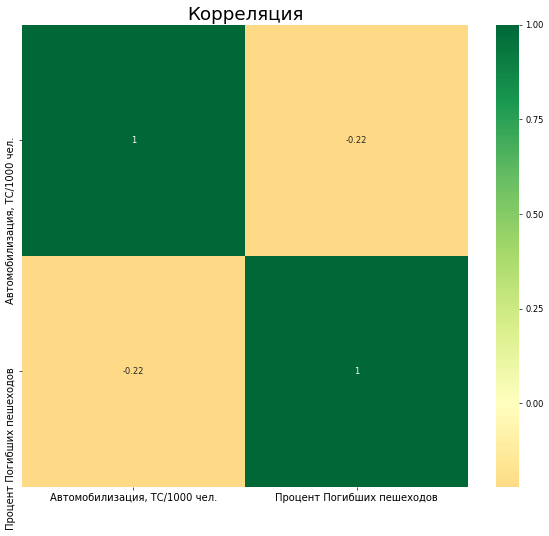

In [13]:
plt.figure(figsize=(12,10), dpi= 60)
sns.heatmap(ff.corr(), xticklabels=ff.corr().columns, yticklabels=ff.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [14]:
ac_cut = accident_rate_wth_int.iloc[:  , 1:]
ac_cut.head()

,"Погибшие в ДТП, чел","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.",Доля пешеходов в числе погибших %,"Население, чел",Количество Погибших пешеходов,Процент Погибших пешеходов
2,691,53211,128,693,16,83607000,111.0,0.000133
3,1107,3432,2439,93,38,84672000,421.0,0.000497
4,384,1344,2222,110,40,3190000,154.0,0.004828
5,371,2720,1200,122,39,30023000,145.0,0.000483
6,1517,7991,1595,325,40,9689000,607.0,0.006265


In [15]:
ac_cut.corr()

,"Погибшие в ДТП, чел","Раненые в ДТП, чел.",К тяжести ДТП,"Автомобилизация, ТС/1000 чел.",Доля пешеходов в числе погибших %,"Население, чел",Количество Погибших пешеходов,Процент Погибших пешеходов
"Погибшие в ДТП, чел",1.000000,0.581129,0.107539,-0.126076,0.141546,0.265016,0.981705,0.535082
"Раненые в ДТП, чел.",0.581129,1.000000,-0.224212,0.081220,-0.181307,0.813359,0.460711,0.089084
К тяжести ДТП,0.107539,-0.224212,1.000000,-0.585976,0.632562,-0.217523,0.150311,0.409716
"Автомобилизация, ТС/1000 чел.",-0.126076,0.081220,-0.585976,1.000000,-0.465733,0.038907,-0.143633,-0.221078
Доля пешеходов в числе погибших %,0.141546,-0.181307,0.632562,-0.465733,1.000000,-0.338490,0.238218,0.606217
"Население, чел",0.265016,0.813359,-0.217523,0.038907,-0.338490,1.000000,0.100355,-0.214292
Количество Погибших пешеходов,0.981705,0.460711,0.150311,-0.143633,0.238218,0.100355,1.000000,0.600002
Процент Погибших пешеходов,0.535082,0.089084,0.409716,-0.221078,0.606217,-0.214292,0.600002,1.000000


## Также построим корреляционную матрицу по всем столбцам

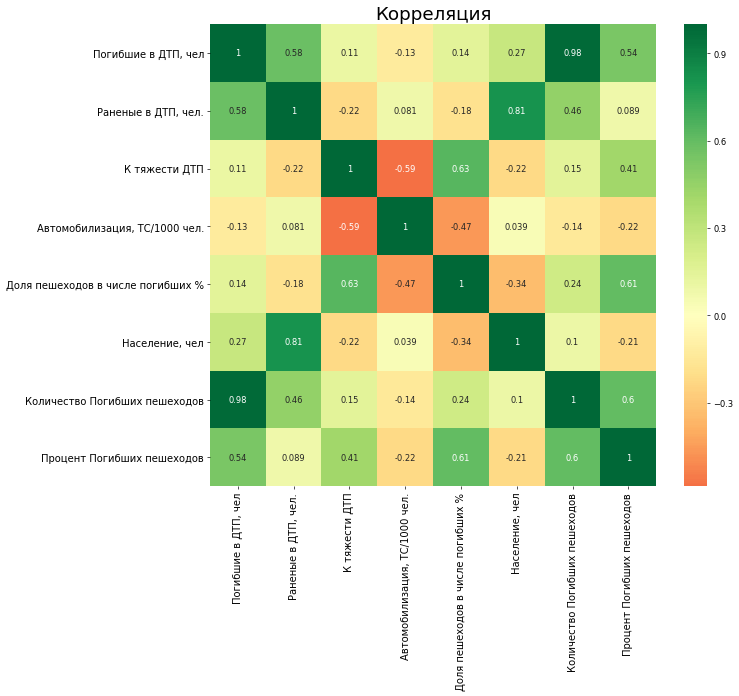

In [16]:
plt.figure(figsize=(12,10), dpi= 60)
sns.heatmap(ac_cut.corr(), xticklabels=ac_cut.corr().columns, yticklabels=ac_cut.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Корреляция', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()